# Week 7 – Model Evaluation
**Course:** Applied Data Science with AI  
**Semester:** BSSE 7th  
**Project:** House Price Prediction  
**Topic:** Evaluating classification models (Precision, Recall, F1, ROC, AUC)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



## Load Data
Using the cleaned dataset from previous weeks.


In [5]:
path = r"C:\Users\123\Documents\Semester 7\Data-Science-AI-Course\Data\Cleaned\cleaned_house_prices.csv"
df = pd.read_csv(path)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,...,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


## Feature Preparation
We'll use selected key features identified earlier for classification.
(Example: classify houses as 'High' or 'Low' price.)


### Code (Feature Engineering)

In [7]:
# Create a binary target: 1 if SalePrice > median, else 0
df['HighPrice'] = (df['SalePrice'] > df['SalePrice'].median()).astype(int)

# Select some important numeric features from correlation analysis (Week 4)
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
X = df[features]
y = df['HighPrice']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training
We'll train Logistic Regression and Random Forest classifiers.


**Code (Train Models)**

In [8]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Predictions
Predict on test data for both models.


In [9]:
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)


## Evaluation Metrics: Accuracy, Precision, Recall, F1-score


**Code (Evaluation)**

In [10]:
models = {'Logistic Regression': y_pred_log, 'Random Forest': y_pred_rf}
for name, preds in models.items():
    print(f"---- {name} ----")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))
    print("F1-score:", f1_score(y_test, preds))
    print("\n")


---- Logistic Regression ----
Accuracy: 0.9125874125874126
Precision: 0.9111111111111111
Recall: 0.9044117647058824
F1-score: 0.9077490774907749


---- Random Forest ----
Accuracy: 0.9230769230769231
Precision: 0.9191176470588235
Recall: 0.9191176470588235
F1-score: 0.9191176470588235




## Confusion Matrices
Visual comparison between Logistic Regression and Random Forest.


**Code (Confusion Matrix)**

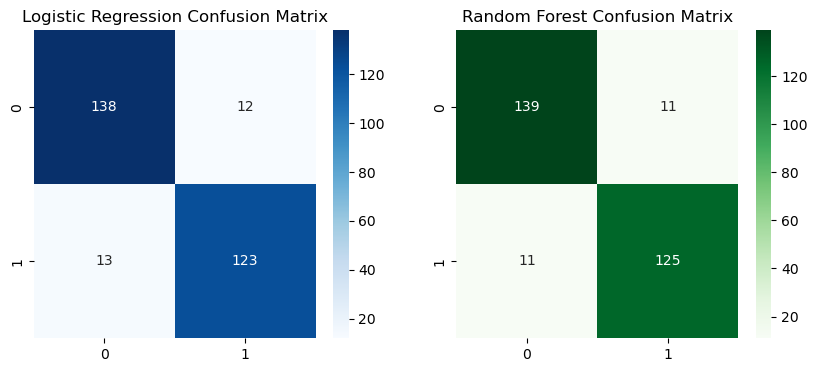

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")

plt.show()


## ROC Curves and AUC
ROC (Receiver Operating Characteristic) shows the trade-off between True Positive Rate and False Positive Rate.


### Code (ROC Curve & AUC)

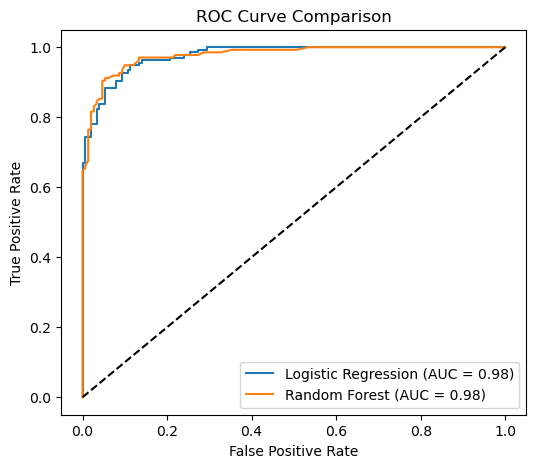

In [12]:
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

roc_auc_log = auc(fpr_log, tpr_log)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## Conclusion
- Random Forest performed better with higher **F1-score** and **AUC**.
- Logistic Regression was simpler but less accurate.
- For this project, **F1-score** is chosen as the main evaluation metric.
- Next week, we'll improve performance using **hyperparameter tuning**.
